In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Display figures as svg in notebook (improves resolution)
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')

# Import the data
houses = pd.read_csv("../data/King_County_House_prices_dataset.csv") # ../ jumps up one level in the directory

In [4]:
# Relabel waterfront = NA as not on waterfront
houses["waterfront"] = houses["waterfront"].fillna(2)
houses["waterfront_cat"] = houses.waterfront.astype(str)
houses.waterfront_cat.replace("waterfront unknown","not on waterfront", inplace=True)
houses.waterfront.replace(2,0, inplace=True)

# Houses with yr_renovated = NAN are treated as if they were never renovated
houses["yr_renovated"] = houses["yr_renovated"].fillna(0)

houses["yr_lastrenewal"] = np.where(
    houses["yr_renovated"] > 0, houses["yr_renovated"], houses["yr_built"])

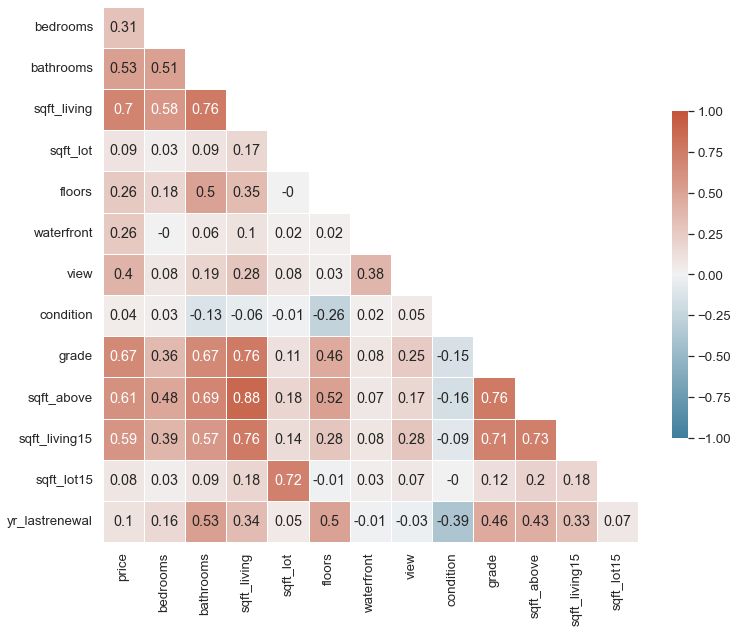

In [16]:
houses_sub = houses[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
                     'condition','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','yr_lastrenewal']]

# Compute the correlation matrix
corr = houses_sub.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# To not display the self-correlated cells, adjust mask and corr
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

sns.set_theme(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="whitegrid", rc={'figure.figsize':(12,12)}, font_scale=1.2)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [23]:
cand_preds = corr[corr["price"] >= 0.3].index.tolist()

In [24]:
cand_preds

['bedrooms',
 'bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_living15']